<a href="https://colab.research.google.com/github/adityasahusomu/Youtube_Comment_Analyzer/blob/main/Youtube_Comment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [4]:
df.sample()['clean_comment'].values

array(['dunno works not but have admit the pills are yummy '],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [7]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(350)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df[(df['clean_comment'].str.strip()=='')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [13]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [14]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [15]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [16]:
df['clean_comment'] = df['clean_comment'].str.strip()

df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [17]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]


In [18]:
comments_with_urls

,clean_comment,category


In [19]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1
...,...,...
35128,火箭o辛基 2016 sughosh bansal mission “make india”...,-1
35230,yikes the title should blind bhakts modi hater...,1
36187,hahahahahhahahah \niska klpd hogya,0
36517,्ा् ी ाी े ो ेी ाी े।\nे ी,0


In [20]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True)

In [21]:
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


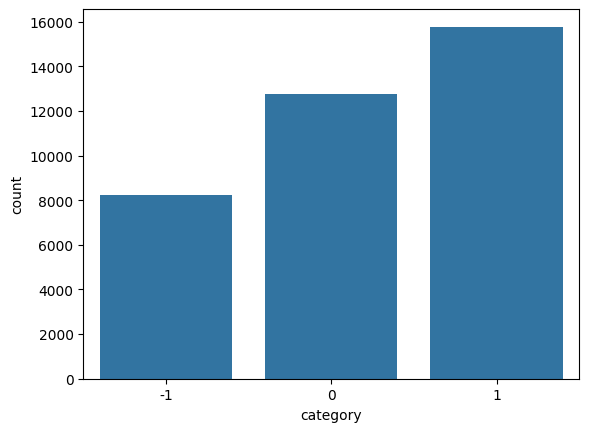

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = 'category')
plt.show()

In [23]:
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [24]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112
...,...,...,...
37244,jesus,0,1
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19
37246,downvote karna tha par upvote hogaya,0,6
37247,haha nice,1,2


In [25]:
df.describe()

,category,word_count
count,36793.000000,36793.000000
mean,0.204414,29.667464
std,0.781729,56.790738
min,-1.000000,1.000000
25%,0.000000,6.000000
50%,0.000000,13.000000
75%,1.000000,30.000000
max,1.000000,1307.000000


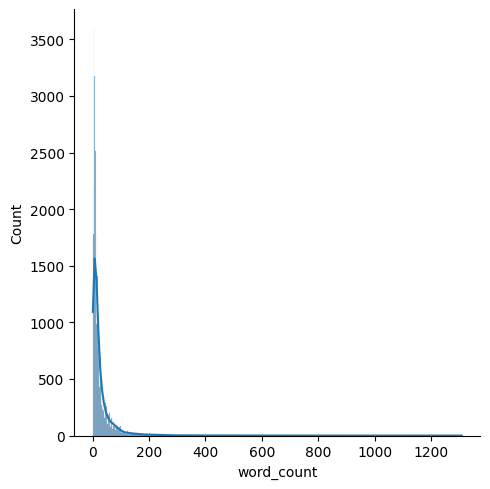

In [26]:
sns.displot(df['word_count'], kde = True)

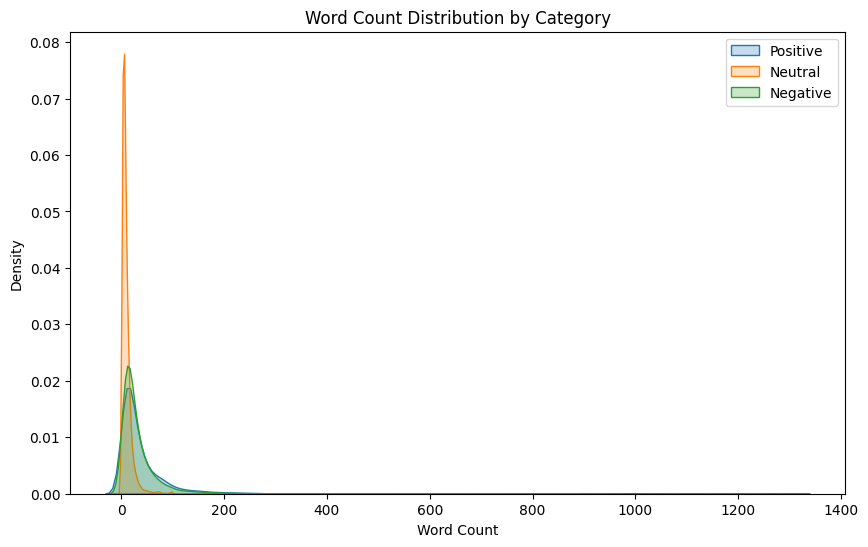

In [27]:
plt.figure(figsize=(10, 6))

#KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

#KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

#KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

plt.legend()
plt.show()

*   Positive comments (category 1): These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.

*   Neutral comments (category 0): The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.

*   Negative comments (category -1): These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.







<Axes: ylabel='word_count'>

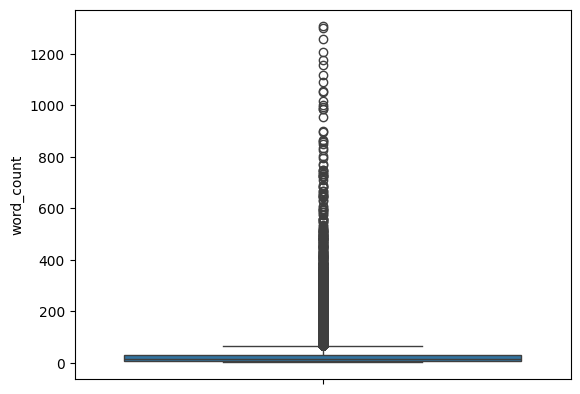

In [28]:
sns.boxplot(df['word_count'])

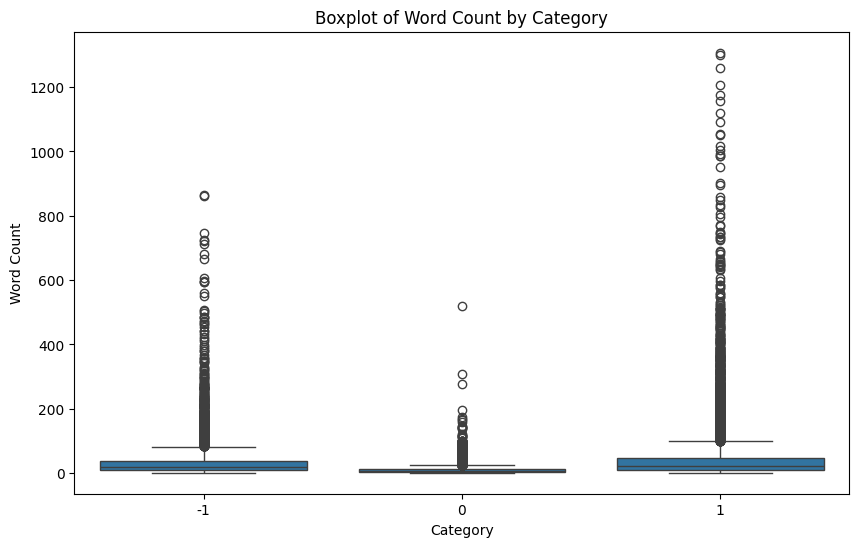

In [29]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

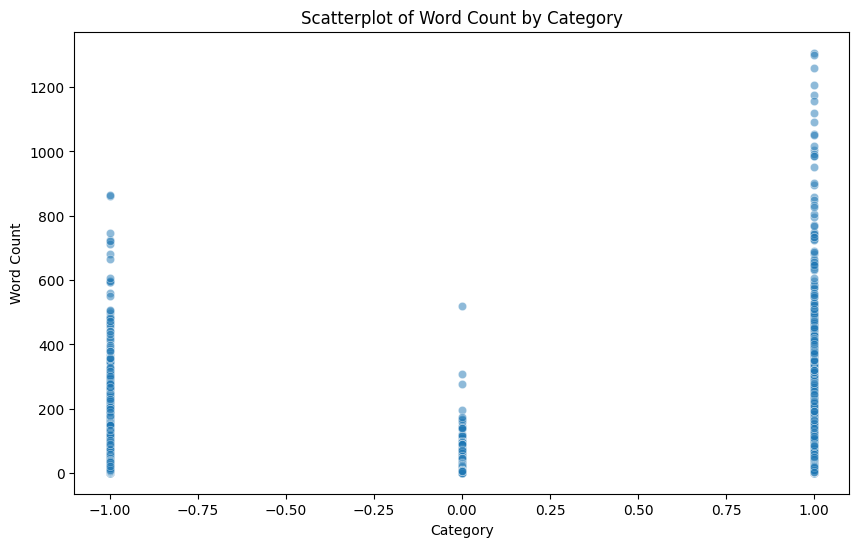

In [30]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

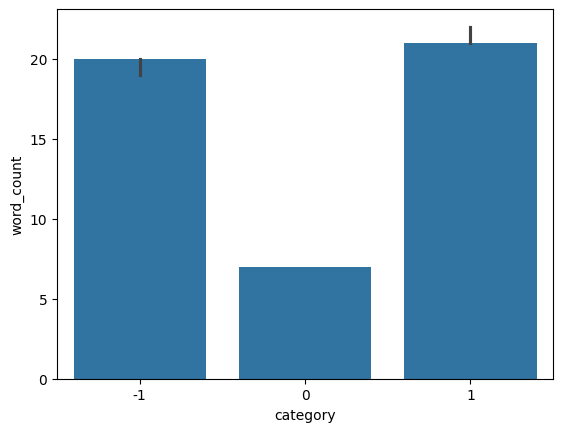

In [31]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

NLP related Preprocessing

In [32]:
!pip install nltk

In [33]:
!pip install spacy

In [34]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,clean_comment,category,word_count,num_stop_words
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


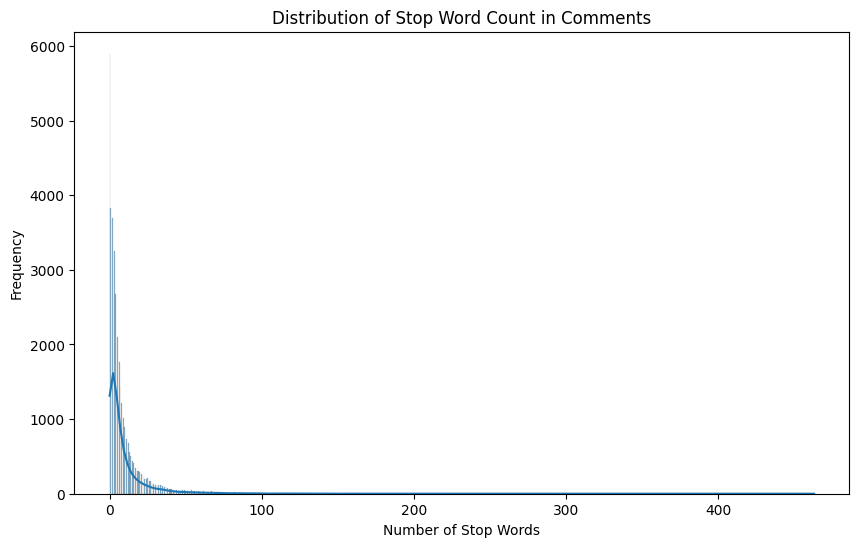

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde = True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

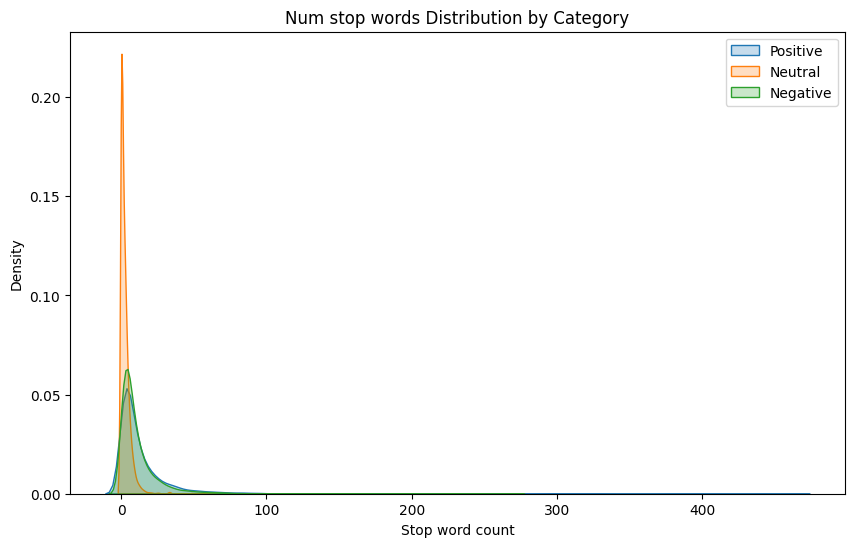

In [36]:
plt.figure(figsize=(10, 6))

# KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# KDE for category -1
sns.kdeplot(df[df['category']== -1]['num_stop_words'], label = 'Negative', fill = True)
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

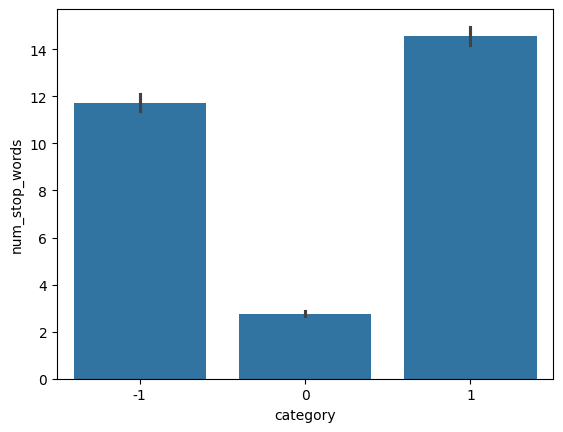

In [37]:
sns.barplot(df,x='category',y='num_stop_words',estimator='mean')

/tmp/ipython-input-761495256.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


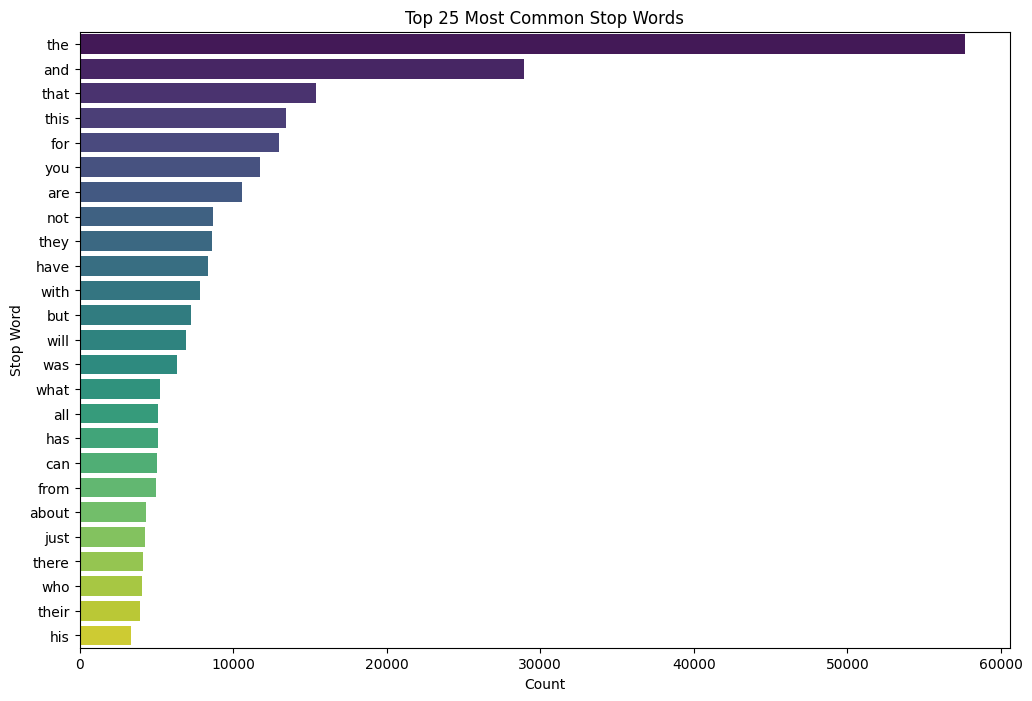

In [38]:
from collections import Counter

all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()


In [39]:
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [40]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [41]:
from collections import Counter

all_text = ' '.join(df['clean_comment'])
char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)
char_frequency_df.head()



,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388


In [42]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [43]:
char_frequency_df['character'].tail(20)

,character
1376,т
1299,角
1300,衰
1350,ూ
1373,ണ
1374,р
1375,ч
1337,毫
1338,违
1339,逍


In [49]:
# to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.head(10)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0
5,you should all sit down together and watch the...,-1,23,9,145,0
6,was teens when discovered zen meditation was t...,1,155,58,963,0
7,jesus was zen meets jew,0,5,1,23,0
8,there are two varieties christians dogmatic th...,-1,82,30,552,0
9,dont worry about trying explain yourself just ...,1,31,13,192,0


In [50]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-3852921429.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


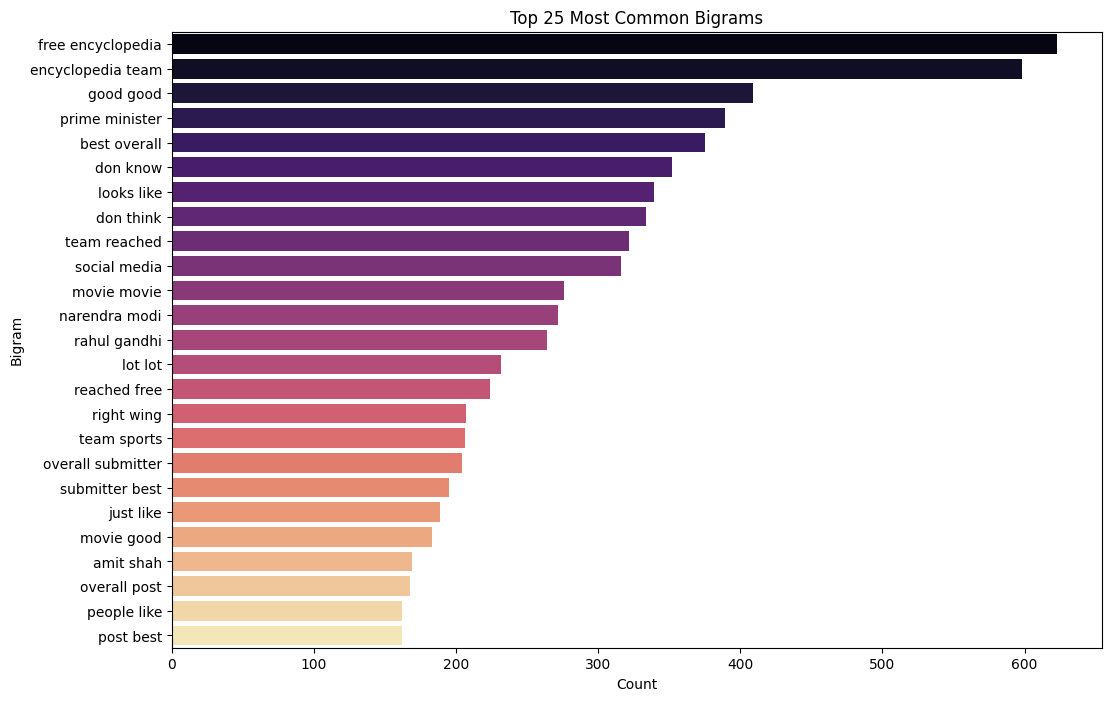

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis =0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  word_freq = sorted(words_freq, key= lambda x: x[1], reverse =True)

  return word_freq[:n]

top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

In [55]:
from collections import Counter
def get_top_ngrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis =0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

  return Counter(dict(words_freq)).most_common(n)

get_top_ngrams(df['clean_comment'], 25)


[('free encyclopedia', np.int64(623)),
 ('encyclopedia team', np.int64(598)),
 ('good good', np.int64(409)),
 ('prime minister', np.int64(389)),
 ('best overall', np.int64(375)),
 ('don know', np.int64(352)),
 ('looks like', np.int64(339)),
 ('don think', np.int64(334)),
 ('team reached', np.int64(322)),
 ('social media', np.int64(316)),
 ('movie movie', np.int64(276)),
 ('narendra modi', np.int64(272)),
 ('rahul gandhi', np.int64(264)),
 ('lot lot', np.int64(232)),
 ('reached free', np.int64(224)),
 ('right wing', np.int64(207)),
 ('team sports', np.int64(206)),
 ('overall submitter', np.int64(204)),
 ('submitter best', np.int64(195)),
 ('just like', np.int64(189)),
 ('movie good', np.int64(183)),
 ('amit shah', np.int64(169)),
 ('overall post', np.int64(168)),
 ('people like', np.int64(162)),
 ('post best', np.int64(162))]

/tmp/ipython-input-1004405171.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


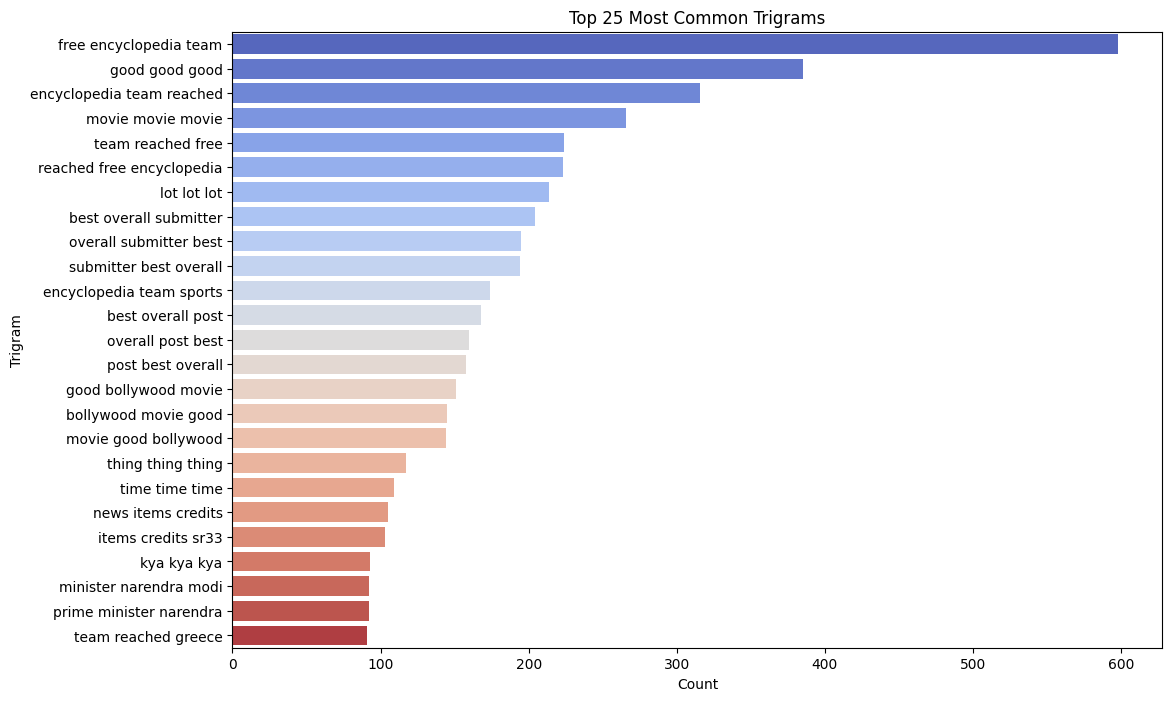

In [56]:
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [57]:
import re
df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [62]:
all_text = ' '.join(df['clean_comment'])

char_freq = Counter(all_text)

char_frequency_df = pd.DataFrame(char_freq.items(), columns=['charecter', 'frequency']).sort_values(by = 'frequency', ascending=False)
char_frequency_df.head()

,charecter,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
